This notebook is showing how to slice the expression level of a single gene in < 10ms. 

In [3]:
import pandas as pd
import numpy as np

In [4]:
def loadDf(fname,mmap_mode='r'):
    with open(fname+'.index.txt') as f:
        myIndex=map(lambda s:s.replace("\n",""), f.readlines())
    with open(fname+'.columns.txt') as f:
        myColumns=map(lambda s:s.replace("\n",""), f.readlines())
    tmpMatrix=np.load(fname+".npy",mmap_mode=mmap_mode)
    tmpDf=pd.DataFrame(tmpMatrix,index=myIndex,columns=myColumns)
    tmpDf.columns.name='Run'
    return tmpDf

### Setting directory for expression matrix

In [5]:
baseDir='/home/jovyan/efs/all_seq/rnaseq_merged/' #Base directory

expression_metric='tpm' #offer Kallisto expression metric: ["tpm","est_counts"]
specie='Homo_sapiens' #Check files in baseDir directory for more species
data_matrix_dir=baseDir+'/{specie}.gene_symbol.{expression_metric}'.format(specie=specie,
                                            expression_metric=expression_metric)

In [6]:
#a memory mapped dataframe
rnaseqDf=loadDf(data_matrix_dir)

### Layout of expression matrix

In [11]:
print ('Dimension of expression matrix: (# of genes, # of sequencing run) ',rnaseqDf.shape)

Dimension of expression matrix: (# of genes, # of sequencing run)  (34739, 192981)


In [5]:
rnaseqDf.head()

Run,SRR5377183,SRR5377184,SRR5330979,SRR5330980,SRR5330981,SRR5330982,SRR5330983,SRR5330984,SRR5330985,SRR5330986,...,ERR1299345,ERR1299346,ERR1299347,ERR1299348,ERR1299349,ERR1299350,ERR1299351,ERR1299352,ERR1299353,ERR1227267
TRDD2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TRDD1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TRDD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGHD4-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGHD4-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Query a single gene

In [6]:
queryGene='TP53'

In [7]:
%time hitGeneS=rnaseqDf.loc[queryGene]

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.15 ms


In [10]:
print ('# sequencing runs extracted: ',len(hitGeneS))

# of RNAseq runs extracted:  192981


Distribution of expression over 100 sampled runs

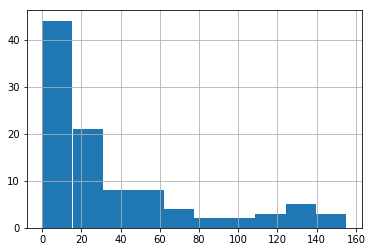

In [9]:
%matplotlib inline
hitGeneS.sample(n=100).hist()